# Chapter 7 - A Gentle Introduction to Object-Oriented Programming

At this stage of programming, you must have realized that programming possesses some idiosyncrasies:

 * Unless a randomization is explicitly build in, all computations are deterministic; i.e., the result is always the same for the same input.
 * The logic involved is binary; i.e., two truth values exist: True and False.
 * There is a clear distinction of *actions* and *data*. Actions are coded into expressions, statements  and functions.  Data is coded into integers, floating points and containers (strings, tuples and lists).
  
The first two can be dealt with in a controlled manner. Furthermore, mostly it is very much preferred to have a crisp and deterministic outcome. But, the third is not so natural. The world we live in is not made of data and independent actions acting on that data. This is merely an abstraction. The need for this abstraction stems from the very nature of the computing device mankind has manufactured, the von Neumann Machine. What you store in the *memory* is either some data (integer or floating point) or some instruction. The *processor* processes the data based on a series of instructions. Therefore, we have a clear separation of data and action in computers. 

But when we look around, we don’t see such a distinction. We see *objects*. We see a tree, a house, a table, a computer, a notebook, a pencil, a lecturer and a student. Objects have some properties which would be quantified as data, but they also have some capabilities that would correspond to some actions. What about reuniting data and action under the natural concept of “object”? *Object Oriented Programming*, abbreviated as OOP, is the answer to this question.


## 7.1 Properties of Object-Oriented Programming

OOP is a paradigm that comes with some properties:   

 * *Encapsulation:* Combining data and  functions that manipulate that data under a concept  that we name as ‘object’  so that a rule of  “need-to-know” and “maximal-privacy” is satisfied. 

 * *Inheritance:*  Defining an object and then using it to create "descendant" objects  so that the descendant objects inherit all functions and data of their ancestors. 

*  *Polymorphism:* A mechanism allowing a descendant object to appear and function like its ancestor object when necessary.

### 7.1.1 Encapsulation

Encapsulation is the property that data and actions are glued together in a data-action structure called 'object' that conforms to a rule of “need-to-know” and “maximal-privacy”. In other words, an object should provide access only to data and actions that are needed by other objects and other data & actions that are not needed should be hidden and used by the object itself for its own merit.

This is important especially to keep implementation modular and manageable: An object stores some data and implements certain actions. Some of these are private and hidden from other objects whereas others are *public* to other objects so that they can access such public data and actions to suit their needs.

The public data and actions function as the interface of the object to the outside world. In this way, objects interact with each other's interfaces by accessing public data and actions. This can be considered as a message passing mechanism: Object1 calls Object2's action f, which calls Object3's function g, which returns a message (a value) back to Object2, which, after some calculation returns another value to Object 1. As a realistic example of a university registration system, assume `Student` object calls `register` action of a `Course` object and it calls `checkPrerequisite` action of a `Curriculum` object. `checkPrerequisite` checks if course can be taken by student
and returns the result. `register` action does additional controls and returns the success status of the registration to the `Student`.

In this modular approach, Object1 does not need to know how Object2 implements its actions or how it stores data. All Object1 needs to know is the public interface via which 'messages' are passed to compute the solution.

Assume you need to implement a simple weather forecasting system. This hypothetical system gets a set of meteorological sensor data like humidity, pressure, temperature from various levels of atmosphere and try to estimate the weather conditions for the next couple of days. The data of such a system may have a time series of sensor values. The actions of such system would be a group of functions adding sensor data as they are measured and forecasting functions for getting the future estimate of weather conditions. For example:

```python
sensors = [{'datetime':'20201011 10:00','temperature':12.3,
            'humidity': 32.2, 'pressure':1.2,
            'altitute':1010.0},
            {'datetime':'20201011 12:00','temperature':14.2,
            'humidity': 31.2, 'pressure':1.22,
            'altitute':1010.0},
            ....]

def addSensorData(sensorarr, temp, hum, press, alt):
    '''Add sensor data to sensor array with
       current time and date'''
    ....

def estimate(sensorarr, offset):
    '''return whether forecast for given
       offset days in future'''
    ...
...
addSensorData(sensors, 20.3, 15.4, 0.82, 10000)
...
print(estimate(sensors, 1))
...
```
In the implementation above, the data and actions are separated. The programmer should maintain the list containing the data and make sure actions are available and called as needed with the correct data. This approach has a couple of disadvantages:

 1. There is no way to make sure actions are called with the correct sensor data format and values (i.e. `estimate('Hello world', 1,1,1,1)`).

 1. `addSensorData` can make sure that sensor list contains correct data, however, since sensors data can be directly modified, its integrity can be violated later on (i.e. `sensors[0]='Hello World'`). 

 1. When you need to have forecast of more than one location, you need to duplicate all data and maintain them separately. Keeping track of which list contains which location requires extra special care.

 1. When you need to improve your code and change data representation like storing each sensor type on a separate sorted list by time, you need to change the action functions. However, if some code directly accesses the sensor data, it may conflict with the changes you made on data representation. For example, if the new data representation is as follows:
 ```python
 sensors = {'temperature': [('202010101000',23),...],
            'humidity': [('2020101000',45.3),...],
            'pressure': [('2020100243',1.02),...]}
 ```
  Any access to `sensors[0]` as a dictionary directly by code segments will be incorrect.

With encapsulation, sensor data and actions are put into the same body of definition so that the only way to interact with the data would be through the actions. In this way:

 1. Data and actions maintained together. Encapsulation mechanism guarantees that data exists and it has correct format and values.

 1. Multiple instances can be created for forecasting for multiple locations, and each location is maintained in its object as if it was a simple variable.

 1. Since no code part accesses the data directly but calls the actions, changing internal representation and implementation of functions will not cause any problem.

The following is an example OOP implementation for the problem at hand:

```python
class WhetherForecast:
  # Data
  __sensors = None

  # Actions acting on the data
  def __init__(self):
    self.__sensors = []   # this will create initial sensor data

  def addSensorData(self, temp, hum, press, alt):
    ....

  def estimate(self, offset):
    ...
    return {'lowest':elow, 'highest':ehigh,...}


ankara = WhetherForecast() # Create an instance for location Ankara
ankara.addSensorData(...)
....

izmir = WhetherForecast()  # Create an instance for location Izmir
izmir.addSensordata(...)
....

print(ankara.estimate(1))  # Work with the data for Ankara
print(izmir.estimate(2))   # Work with the data for Izmir
```

The above syntax will be more clear in the following sections; however, please note how the newly created objects `ankara` and `izmir` behave. They contain their sensor data internally, and the programmer does not need to care about their internals. The resulting object will syntactically behave like a built-in data type of Python.

### 7.1.2 Inheritance

In many applications, the objects we are going to work with are going to be related. For example, in a drawing program, we are going to work with shapes such as rectangles, circles, triangles which have some common data and actions, e.g.:
- Data:
  - Position
  - Area
  - Color
  - Circumference
- and actions:
  - draw()
  - move()
  - rotate()

What kind of data structure we use for these data and how we implement the actions are important. For example, if one shape is using Cartesian coordinates ($x,y$) for position and another is using Polar coordinates ($r,\theta$), a programmer can easily make a mistake by providing ($x,y$) to a shape using Polar coordinates. 

As for actions, implementing such overlapping actions in each shape from scratch is redundant and inefficient. In the case of separate implementations of overlapping actions in each shape, we would have to update all overlapping actions if we want to correct an error in our implementation or switch to a more efficient algorithm for the overlapping actions. Therefore, it makes sense to implement the common functionalities in another object and reuse them whenever needed.

These two issues are handled in OOP via inheritance. We place common data and functionalities into an ancestor object (e.g. `Shape` object for our example) and other objects (`Rectangle`, `Triangle`, `Circle`) can inherit (reuse) these data and definitions in their definitions as if those data and actions were defined in their object definitions.

In real life entities, you can observe many similar relations. For example:

* A `Student` is a `Person` and an `Instructor` is a `Person`. Updating personal records of a `Student` is no different than that of an `Instructor`.

* An `DCEngine`, a `DieselEngine`, and a `StreamEngine` are all `Engine`s. They have the same characteristic features like horse power, torque etc. However, `DCEngine` has power consumption in units of Watt whereas `DieselEngine` consumption can be measured as litres per km.

* In a transportation problem, a `Ship`, a `Cargo_Plane` and a `Truck` are all `Vehicle`s. They have the same behaviour of carrying a load; however, they have different capacities, speeds, costs and ranges.

Assume we like to improve the forecasting accuracy through adding radar information in our `WhetherForecast` example above. We need to get our traditional estimate and combine it with the radar image data. Instead of duplicating the traditional estimator, it is wiser to use existing implementation and *extend* its functionality with the newly introduced features. This way, we avoid code duplication and when we improve our traditional estimator, our new estimator will automatically use it.

Inheritance is a very useful and important concept in OOP. Together with encapsulation, it improves reusability, maintenance, and reduces redundancy.

### 7.1.3 Polymorphism

Polymorphism is a property that enables a programmer to
write functions that can operate on different data types uniformly. For example, calculating the sum of elements of a list is actually the same for a list of integers, a list of floats and a list of complex numbers. As long as the addition operation is defined among the members of the list, the summation operation would be the same. If we can implement a polymorphic `sum` function, it will be able to calculate the summation of distinct datatypes, hence it will be polymorphic.

In OOP, all descendants of a parent object can act as objects of more than one types. Consider our example on shapes above: The `Rectangle` object that inherits from the `Shape` object can also be used as a `Shape` object since it bears data and actions defined in a `Shape` object. In other words, a `Rectangle` object can be assumed to have two data types: `Rectangle` and `Shape`. We can exploit this for writing polymorphic functions. If we write functions or classes that operate on `Shape` with well-defined actions, they can operate on all descendants of it including, `Rectangle`, `Circle`, and all objects inheriting `Shape`. Similarly, actions of a parent object can operate on all its descendants if it uses a well-defined interface.

Polymorphism improves modularity, code reusability and expandability of a program.

## 7.2 Basic OOP in Python

The way Python implements OOP is not to the full extent in terms of the properties listed in the previous section. Encapsulation, for example, is not implemented strongly. But inheritance and polymorphism are there. Also, operator overloading, a feature that is much demanded in OOP, is present.

In the last decade, Python started to become a standard for Science and Engineering computation. For various computational purposes, software packages were already there. Packages to do numerical computations, statistical computations, symbolic computations, computational chemistry, computational physics, all sorts of simulations were developed over four decades. Now many such packages, free or proprietary, are *wrapped* to be called through Python. This packaging is done mostly in an OOP manner. Therefore, it is vital 
to know some basics of OOP in Python. 


### 7.2.1 The Class Syntax

In Python, an object is a code structure that is like in <font color=gray>Figure 7.1</font>:

<center>
<img src="https://github.com/sinankalkan/CENG240/blob/master/figures/oop1.png?raw=true" alt="An Object in Pyhton" title="Logical AND evaluation scheme" width=200 align=center/> 

*Figure 7.1. An object includes both data and actions (methods and special methods) as one data item.*
</center>

First, a piece of jargon:

* ***Class:*** A prescription that defines a particular object. The blueprint of an object.

* ***Class Instance***$\;\equiv\; $***Object:*** A computational structure that has functions and data fields built according the blueprint, namely the 
class. Similar to the construction of buildings according to an architectural blueprint, in Python we can create *objects* (more than one) conforming to a class definition. Each of these objects will have their own data space and in some cases customized functions. Objects are equivalently called *Class instances*. Each object provides the following:

  * ***Methods:*** Functions that belong to the object.
  * ***Sending a message to an object:*** Calling a method of the object.
  * ***Member:*** Any data or method that is defined in the class.

 So, as you would guess, we start with a structural plan, using the jargon, the 'class definition'. In Python this is done by the keyword `class`:

 `class` $\boxed{\color{Red}{ClassName\strut\ }}$ `: `

   $\hspace{2cm} \boxed{\ \\ \ \\ \ \\ \hspace{0.3cm} \color{Red}{\ Statement\ block}\hspace{0.3cm} \\ \ \\ \strut}$

Here is an example:

```python
class shape:
   color = None
   x = None
   y = None

   def set_color(self, red, green, blue):
      self.color = (red, green, blue)

   def move_to(self, x, y):
      self.x = x
      self.y = y
```

This blueprint tells Python that:

1. The name of this class is `shape`.

2. Any object that will be created according to this blueprint has three data fields, named `color`, `x` and `y`. At the moment of creation, these fields are set to `None` (a special value of Python indicating that there is a variable here but no value is assigned yet).

3. Two member functions, the so-called methods, are defined: `set_color` and `move_to`. The first takes four arguments, constructs a tuple of the last three values and stores it into the `color` data field of the object. The second, `move_to`, takes three arguments and assign the last two of them to the `x` and `y` data_fields, respectively.

The peculiar keyword `self` in the blueprint refers to the particular instance (when an object is created based on this blueprint). The first argument to all methods (the member functions) have to be coded as `self`. That is a rule.  The Python system will fill it out when that function is activated.

To refer to any function or any data field of an object, we use the (.) dot notation. Inside the class definition, it is `self.∎`. Outside of the object, the object is certainly stored somewhere (a variable or a container). The way (syntax) to access the stored object is followed. Then, this syntax is appended by the (.) dot which is then followed by the data field name or the method name.


For our example `shape` class, let us create two objects and assign them to two global variables `p` and `s`, respectively:

```python
p = shape()
s = shape()
p.move_to(22, 55)
p.set_color(255, 0, 0)
s.move_to(49, 71)
s.set_color(0, 127, 0)
```

The object creation is triggered by calling the class name as if it is a function (i.e. `shape()`). This creates an _instance_ of the class. Each instance has its private data space. In the example, two `shape` objects are created and stored in the variables `p` and `s`. As said, the object stored in `p` has its private data space and so does `s`. We can verify this by:

```python
print(p.x, p.y)
print(s.x, s.y)
```

When a class is defined, there are a bunch of methods, which are automatically created, and they serve the integration of the object with the Python language.
For example, what if we issue a print statement on the object? What will

```python
print(s)
```

print?

These default methods can be overwritten (redefined). Let us do it for two of them: `__str__` is the method that is automatically activated when a `print` function has an object to be printed. The built-in print function sends to the object an `__str__` message (that was the OOP jargon, i.e. calls the `__str__` member function (method)). All objects, when created, have a some *special methods* predefined. Many of them are out of the scope of this course, but `__str__` and `__init__` are among these special methods. 

It is possible that the programmer, in the class definition,  overwrites (redefines) these predefinitions. `__str__` is set to a default definition so that when an object is printed such an internal location information is printed:

```python
<__main__.shape object at 0x7f295325a6a0>
``` 

Not very informative, is it? We will overwrite this function to output the color and coordinate information, which will look like: 

```python
shape object: color=(0,127,0) coordinates=(47,71)
```

The second special method that we will overwrite is the `__init__` method. `__init__` is the method that is automatically activated when the object is first created. As default, it will do nothing, but can also be overwritten. Observe the following statement in the code above:

```python
s = shape()
```
The object creation is triggered by calling the class name as if it is a function. Python (and many other OOP languages) adopt this syntax for object creation. What is done is that the arguments passed to the class name is sent 'internally' to the special member function `__init__`. We will overwrite it to take <u>two arguments</u> at object creation, and these arguments will become the initial values for the x and y coordinates.  
 
Now, let us switch to the real interpreter and give it a go:

In [ ]:
class shape:
  color = None
  x = None
  y = None
 
  def set_color(self, red, green, blue):
    self.color = (red, green, blue)
 
  def move_to(self, x, y):
    self.x = x
    self.y = y

  def __str__(self):
    return "shape object: color=%s coordinates=%s" % (self.color, (self.x,self.y))

  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __lt__(self, other):
    return self.x + self.y < other.x + other.y

p = shape(22,55)
s = shape(12,124)
p.set_color(255,0,0)
s.set_color(0,127,0)

print(s)
s.move_to(49,71)
print(s)

print(p.__lt__(s)) 
print(p < s)  # just the same as above but now infix

print(s.__dir__())

shape object: color=(0, 127, 0) coordinates=(12, 124)
shape object: color=(0, 127, 0) coordinates=(49, 71)
True
True
['x', 'y', 'color', '__module__', 'set_color', 'move_to', '__str__', '__init__', '__lt__', '__dict__', '__weakref__', '__doc__', '__repr__', '__hash__', '__getattribute__', '__setattr__', '__delattr__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']


### 7.2.2 Special Methods/Operator Overloading

There are many more special methods than the ones we described above. For a complete reference, we refer you to ["Section 3.3 of the Python Language Reference"](https://docs.python.org/3/reference/).

Last, but not least, a special method to mention is the magnitude comparison for an object. In other words, if you have an object, how will it behave under comparison? For example, the following rich comparisons are possible:

* `x<y` calls `x.__lt__(y)`, 
* `x<=y` calls `x.__le__(y)`, 
* `x==y` calls `x.__eq__(y)`, 
* `x!=y` calls `x.__ne__(y)`, 
* `x>y` calls `x.__gt__(y)`, and 
* `x>=y` calls `x.__ge__(y)`.

Having learned this, please copy-and-paste the following definition to the class definition of `shape` above in to the code box. Now, you have the (`<`) comparison operator available. 

```python
  def __lt__(self, other):
    return self.x + self.y < other.x + other.y
```

As you can see, the comparison result is based on the *Manhattan distance* from the origin. You can give it a test right away and compare the two objects `s` and `p` as follows:

```python
print(s<p)
```

How would you modify the comparison method so that it compares the Euclidean distances from the origin?

As we have created our first object in Python, we strongly advise that the 'encapsulation' property of OOP is followed by the programmer, i.e. you. This property is that the data of an object is private to the object and not 
open to modification (or not even to inspection if 'encapsulation' is taken extremely strictly) by a piece of code external to the object. Only member functions, the so-called methods, of that object can do this. Therefore, if you want to update the `color`  value, for example, of an `shape` object, though you can do it 'brutally' by e.g.:

```python
p.color = (127,64,5)
```

However, you should not to do so. In contrary to some other OOP programming languages, Python does not forbid this by a brutal force. Therefore, it is not a ***you cannot*** but a ***you should not*** type of action.  All data access should be done through messages (functions).



### Example 1: Counter

Now, let us implement a very simple object called `Counter`. Counter has two important restrictions: it starts with zero and it can only be incremented. If you use a simple integer variable instead of `Counter`, its value can be initialized to any value and it can directly be assigned to an arbitrary value. Implementing a Python class for a `Counter` will let you enforce those restrictions since you define the initialization and the actions.

In [ ]:
class Counter:
  def __init__(self):
    self.value = 0    # this is the initialization

  def increment(self):
    '''increment the inner counter'''
    self.value += 1

  def get(self):
    '''return the counter as value'''
    return self.value

  def __str__(self):
    '''define how your counter is displayed'''
    return 'Counter:{}'.format(self.value)

stcnt = Counter()    # create the counter
stcnt.increment()
stcnt.increment()
print("# of students", stcnt)

sheep = Counter()
while sheep.get() < 1000:
  sheep.increment()

print("# of sheep",sheep)


# of students Counter:2
# of sheep Counter:1000


### Example 2: Rational Number

As our next example, let us try to define a new data type, **Rational Number**, as a Python class. Representing a rational number simply as a tuple of integers as `(numerator, denominator)` is possible. However, this representation has a couple of issues. First, the denominator can be 0, which leads to an invalid value. Second, many distinct tuples represent practically the same value and they need to be interpreted in a special way in operators like comparison. We need to either normalize all into their simplest form or implement comparison operators to respect the values they represent. In the following implementation, we choose the first approach: We find greatest common divisor of numerator and denominator and normalize them.

In [ ]:
import math

class Rational:
  def __init__(self, n, d):
    '''initialize from numerator and denominator values'''
    if d == 0:
      raise ZeroDivisionError   # raise an error. Explained in following chapters
    self.num = n
    self.den = d
    self.simplify()

  def simplify(self):
    if self.num == 0:
      self.den = 1
      return
    gcd = math.gcd(self.num,self.den)
    if self.den < 0:             # flip their signs if denominator is negative
      self.den *= -1
      self.num *= -1    
    self.num = self.num // gcd
    self.den = self.den // gcd   # normalize them by dividing by greatest common divisor

  def __str__(self):
    return '{}/{}'.format(self.num, self.den)

  def __mul__(self, rhs):        # this special method is called when * operator is used
     ''' (a/b)*(c/d) -> a*c/b*d in a new object '''
     retval = Rational(self.num * rhs.num, self.den * rhs.den) # create a new object
     return retval
  
  def __add__(self, rhs):        # this special method is called when * operator is used
     ''' (a/b)+(c/d) -> a*d+b*c/d*b in a new object '''
     retval = Rational(self.num * rhs.den + rhs.num * self.den, 
                       self.den * rhs.den) # create a new object with sum
     return retval

  # -, /, and other operators left as exercise

  def __eq__(self, rhs):        # called when == operator is used
    '''a*d == b*c '''
    return self.num*rhs.den == self.den*rhs.num
    
  def __lt__(self, rhs):        # called when < operator is used
    '''a*d < b*c '''
    return self.num*rhs.den < self.den*rhs.num

  # rest can be defined in terms of the first two
  def __ne__(self, rhs):  return not self == rhs
  
  def __le__(self, rhs):  return self < rhs or self == rhs

  def __gt__(self, rhs):  return not self <= rhs
  
  def __ge__(self, rhs):  return not self < rhs

In [ ]:
# Let us play with our Rational class

a = Rational(3, 9)
b = Rational(16, 24)
print(a, b, a*b+b*a)
print(a<b, a+b == Rational(1, 1))

1/3 2/3 4/9
True True


This class definition only implements `*, +`, and comparison operators. The remaining operators are left as an exercise. Our new class `Rational` behaves like a built-in data type in Python, thanks to the special methods implemented. User-defined data types implementing integrity restrictions through encapsulation are called **Abstract Data Types**.



### 7.2.3 Inheritance with Python

Now let's have a look on the second property on OOP, namely 'inheritance', in Python. We will do that by extending our `shape` example. 

A `shape` is relatively a general term. We have many types of shapes: Triangles, circles, ovals, rectangles, even polygons. If we incorporated them into a software, for example, a simple drawing and painting application for children, each of them would have a position on the screen and a color. This would be common to all shapes. But then, a circle would be identified (additionally) by a radius; a triangle by two additional corner coordinates etc.

Therefore, a `triangle` object should inherit all the properties and member functions of a `shape` object plus some other. 

Starting to define a `triangle` object, for example, with all properties and member functions copied from `shape` is done by a first line:

```python
class triangle(shape):
```

following the general syntax below:

 <big><big>**`class`**</big></big> $\boxed{\color{Red}{ClassName}}$<big><big>**`(`**</big></big>
${\color{Red}{BaseClass_1}}$<big><big>**`,`**</big></big> 
${\color{Red}{BaseClass_2}}$<big><big>**`,`**</big></big> 
${\color{Red}{\cdots}}$<big><big>**`):`**</big></big>  <br>
 $\hspace{5ex} \boxed{\ \\ \ \\ \color{Red}{\ Statement\ block}\strut\ \ \\ \ \\ } $ 

Though multiple inheritance (inheriting form more than one class) is possible, it is seldom used and is not prefered. It has elaborated rules for resolving member function name clashes, which is beyond the scope of an introductory book. We will continue with an example that does inheritance from a single base class. 

### Interactive Example: A Simple Shape Drawing Program

Below, you see a simple object-oriented Python code that draws a red circle and a green rectangle, and then moves the green rectangle towards the circe. When you hover your mouse over the code below, a popup window will explain that line of code.

Following this interactive code display, you can find a code box, the one with a small triangle on the left, which is the same code. So, you can run it, and observe the code code live, running. In the exercise part, you will be asked to modify the code.

The dark brownish sections in the code contain calls to a drawing library (named `calysto`) which is also object oriented but has nothing to do with you. Not to distract the reader intentionally, we have darkened it out. 

Our object-oriented programming (OOP) intention in this example is to define a general class that we will name `shape`. `shape` contains all the properties and functions that a drawable geometric object (circle, rectangle, triangle, …) possesses. All of them are drawn on an imaginary canvas at a certain coordinate with some color. So, all shapes have a coordinate at which they are drawn and a color. The first lines of the `class shape` definition starts with these variables. 

**[You can get additional information by hovering your mouse over  any piece of code.]**

In this example, we implement just two geometric shapes, the circle and the rectangle.  This piece of code  with the green background is the definition of the `circle` class. It is _derived_ from the _base_ class `shape`. So, it _inherits_ all the definitions of `shape` (but these definitions can be overwritten, in other words, can be redefined). As you observe, it defines a `radius` variable (in addition to the `color`, `x`, `y` variables that were inherited form the base class). Also, it defines, for the first time, a `draw` member function which has the duty to draw a `circle` on the canvas, based on the parameters `x`, `y`, `radius` and `color` using some functions of the library `calysto`. The details of this drawing implementation is not the reader's concern (therefore it is darkened out). 

**[You can get additional information by hovering your mouse over  any piece of code.]**

The second geometric shape, which is implemented, is the rectangle. The orange backgrounded code defines this class. Again, it is a _descendent_ of the base class `shape`. Hence, it _inherits_ all the definitions of `shape` (just as circle did). This time, it does not add a `radius` but a `width` and a `height` variables to the class. In addition to the redefinition of the initializer `__init__`, which is activated the moment an instance is created, this class has its own definition of the `draw` member function.

**[You can get additional information by hovering your mouse over  any piece of code.]**

Now, for an instance, return to the `class shape` definition (the yellow box). There, you will see a `displace` member function being defined. It is a function that displaces a geometric shape by an amount of $(\Delta x,\Delta y)$. Please inspect the function now. You will discover that the function:

* memorizes the color of the shape,
* changes the color to white,
* calls the `draw` member function and draws a white shape exactly on top of the old one,
* restores the drawing color (from white to the memorized color),
* changes the `x`, `y` values by amounts `delta_x` and `delta_y`, respectively,
* calls the `draw` member function and draws at the new `x`,`y` coordinates the shape with the original color.

Now we have an interesting phenomenon. `draw` is even not defined in `shape`. It will be defined differently for each class that is derived from the `shape` base class. How can a function of `shape` make a reference to a function which does not exist for `shape` and will only be defined in classes that are descendants of this base class? Also note that the each of the descendant classes (`circle` and `rectangle`) are going to define it (the `draw` function) their own way. This is called forward-referencing and polymorphism, a nice and powerful feature of OOP.

Note that the class definitions (`class shape`, `class circle`, `class rectangle`) are merely blueprints. They do not create any data. They define how they will be created and which functions will act how. The actual creation (based on these blueprints) are done in the code in the last (turquoise colored) box. 

In summary, the code below performs the following:

* An instance of the `circle class` is created (by calling its initializer) at coordinates (`100`,`100`) with a radius of `50`. This instance is stored into the variable `mycircle`.
* The color of this freshly created object is changed to the brightest red. 
* The object's `draw` function is called (in OOP jargon: a `draw` message is sent to the object stored in  `mycircle`) 
* Similarly, an instance of `rectangle class` is created at  coordinates (`200`,`100`)  and with `width=50`, `height=80`. This instance is stored into the variable `myrectangle`.
* The color of the rectangle is changed to the brightest green. 
* The  rectangles  `draw` function is called.
* The program pauses (waits) for `1` second. 
* Finally, it calls the displace function of the rectangle. Though it was defined in the base class, `displace` locates the correct `draw` (the draw of the rectangle) and performs the job.  


In [ ]:
#@title 
from IPython.display import display,HTML
 
htmlbody='''
<style>
 #messagebox {
   position:absolute; 
   top:20px; 
   right:10px; 
   text-size: %120;
   background-color: red;
   color:white;
}
</style>
<div style="position:relative; top:0px; left:0px;">
<img id="sourceimg" style="position:absolute; top:10px; left:10px;" src="https://github.com/sinankalkan/CENG240/blob/master/figures/geometricshapeprogram.png?raw=true" width=700>
<div id="messagebox">
</div>
</div>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.1/jquery.min.js"></script> 
<script>
function makemap(imageid, coor_messlist, messageboxid, mboxfloats = true ) {
  $("#" + imageid).mousemove(function (ev) {
    let off = $("#" + imageid).offset();
    let ex = ev.pageX - off.left;
    let ey = ev.pageY - off.top;
    let mbox = $("#" + messageboxid);
    for (i in coor_messlist) {
        let l = coor_messlist[i];
        if (ex >= l[0] && ex <= l[2] && ey >= l[1] && ey <= l[3]) {
          console.log(ex,ey,l)
          mbox.text(l[4]).show();
          if (mboxfloats) {
            mbox.css('top',ey).css('left',ex);
          }
          return;
        }
    }
    mbox.text('').hide();
  })
}

let messages = [
[10, 17, 450, 118, "◀ This part is about loading the drawing library, and is not of your concern. Simply ignore it."],
[10, 150, 450, 156, "◀ We name the class that is going to be defined below as 'shape'"],
[10, 188, 450, 232, "◀ We have three data fields internal to the class. (For the moment we don not store a numerical value in)"],
[10, 264, 450, 289, "◀ We are defining the set_color member function. It will be called with three (the self is internally sent) arguments, the rgb values, which will be made into a tuple and stored into color data field."],
[10, 321, 450, 365, "◀ Definition of another member function. Stores the arguments it will receive into the class variables (data fields) x, y"],
[10, 397, 450, 422, "◀ When an instance (object) of this class is going to be printed (by means of a print function), internally this member function will jump in and provide the content to be printed (as a string)."],
[10, 454, 450, 498, "◀ This member function will be called when an instance of this class is created.  For example 'triangle = shape(40,70)' will create a shape object with coordinates (40,70)."],
[10, 530, 450, 650, "◀ To move a 'shape' object to another coordinate this member function is going to be called. The programmer has to provide a displacement amount, both in x and y, then this function first overpaints the shape with the background color (which is white) so it is erased from screen, then updates its coordinates and redraw it. This is interesting because there is no 'draw' member function of 'shape' class. 'circle' and 'rectangle' classes which are derived from (is a descendent of)  the 'shape' class will be defining 'draw'. Interestingly each derived class will have a 'draw' of its own. Since drawing a circle has nothing to do with drawing a rectangle. This ability of forward referencing is due to polymorphism."],
[10, 682, 450, 688, "◀ A new class is being defined with the name 'circle'. It is a descendent of the 'shape' class. So, it inherits all what is defined in 'shape': all data fields and all member function of 'shape'. "],
[10, 720, 450, 726, "◀ This class adds a new data field, named radius, to the existing ones. "],
[10, 758, 450, 840, "◀ The initializer is redefined. This time, in addition to the coordinates, a radius is taken as argument and saved, furthermore the color of a circle is set to red ((255,0,0) rgb value is pure red).  "],
[10, 872, 450, 992, "◀ A draw for the 'circle' is being defined. The grayed portion of the code uses calls to the used drawing library which is not of our concern. Just know that this portion of the code physically draws a circle on the screen at coordinates (x, y) and with a radius stored in the 'radius' data field."],
[10, 1062, 450, 1068, "◀ A new class is being defined with the name 'rectangle'. It is a descendent of the 'shape' class. So, it inherits all what is defined in 'shape': all data fields and all member function of 'shape'."],
[10, 1100, 450, 1125, "◀ This time not a 'radius' but a 'width' and a 'height' field is added to the already existing x and y fields."],
[10, 1157, 450, 1258, "◀ The initializer is redefined. This time, in addition to the coordinates at creating time a width and height parameter also have to be provided. A rectangle has also the color set as pure red: (255,0,0)"],
[10, 1290, 450, 1448, "◀ A 'draw' member function  for the 'rectangle' is being defined. The grayed portion of the code uses calls to the used drawing library which is not of our concern. Just know that this portion of the code physically draws a rectangle on the screen at coordinates (x, y) of dimensions 'width' by 'height'."],
[10, 1499, 450, 1505, "◀ The class definitions ended."],
[10, 1518, 450, 1524, "◀ An instance of the 'circle' class is created at coordinate: (100,100) with a radius:50. The color is internally set to red. This object is stored into the variable 'mycircle'. Nothing is displayed yet."],
[10, 1556, 450, 1562, "◀ The 'draw' member function of the object stored in the 'mycircle' is called. The object was a 'circle'. So the draw of 'circle' class is called, a red circle is physically drown on the screen."],
[10, 1594, 450, 1600, "◀ An instance of the 'rectangle' class is created at coordinate: (200,100) with dimensions 50x80 and color:red. The created object is stored in the 'myrectangle' variable.  It is NOT displayed yet."],
[10, 1613, 450, 1619, "◀ The color of the rectangle was internally set to red. This line changes it to green ((0,255,0) is pure green)."],
[10, 1632, 450, 1638, "◀ The rectangle is drawn on the screen (we observe that line 85 functioned)"],
[10, 1651, 450, 1657, "◀ This is a internal function call that makes the program wait for 1 second."],
[10, 1670, 450, 1676, "◀ The rectangle is displaced by -60 in x and -10 in y. The color is memorized (line 29). Color is changed to white (line 30). It is erased from its original position by being redrawn (in white). The original color is  restored (line 32). Then its coordinates got updated  (line 33) and redrawn (line 34)."],
];

makemap('sourceimg', messages, 'messagebox');
</script>
'''
display( HTML(htmlbody) )



<font color="red"><big>
Before running the program, first you have to run the first code box below (this will install/load necessary graphics libraries). Do not hit "SHOW CODE", there is nothing that you have to inspect in there.
</big>
</font>

In [ ]:
# Install the calysto library
!pip install calysto

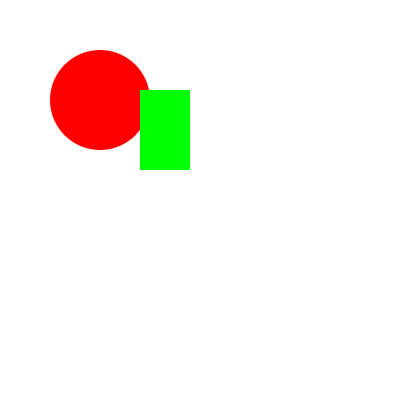

In [ ]:
from calysto.graphics import *
from calysto.display import display, clear_output
import time
import math

CANVAS_240 = Canvas(size=(400, 400))

class shape:

  color = None
  x = None
  y = None
 
  def set_color(self, red, green, blue):
    self.color = (red, green, blue)
 
  def move_to(self, x, y):
    self.x = x
    self.y = y

  def __str__(self):
    return "shape object: color=%s coordinates=%s" % (self.color, (self.x, self.y))

  def __init__(self, x, y):
    self.x = x
    self.y = y

  def displace(self, delta_x, delta_y):
    shape_has_color = self.color
    self.set_color(255, 255, 255) # that is white. i.e. the background color
    self.draw()
    self.color = shape_has_color
    self.move_to(self.x+delta_x, self.y+delta_y)
    self.draw()

class circle(shape):

  radius = None

  def __init__(self, x, y, radius):
    self.x = x
    self.y = y
    self.radius = radius
    self.set_color(255, 0, 0)
     
  def draw(self):
    c = Circle((self.x, self.y), self.radius)
    c.fill(Color(self.color[0], self.color[1], self.color[2]))
    c.noStroke()
    clear_output(wait=True)
    c.draw(CANVAS_240)
    display(CANVAS_240)
    
    
    
class rectangle(shape):

  width = None
  height = None

  def __init__(self, x, y, width, height):
    self.x = x
    self.y = y
    self.width = width
    self.height = height
    self.set_color(255, 0, 0)
     
  def draw(self):
    rb = (self.x+self.width, self.y)
    ru = (self.x+self.width, self.y+self.height)
    lu = (self.x, self.y+self.height)
    lb = (self.x, self.y)
    r = Polygon([lb,rb,ru,lu])
    r.fill(Color(self.color[0], self.color[1], self.color[2]))
    r.noStroke()
    clear_output(wait=True)
    r.draw(CANVAS_240)
    display(CANVAS_240)

mycircle = circle(100, 100, 50)
mycircle.set_color(255, 0, 0)
mycircle.draw()

myrectangle = rectangle(200, 100, 50, 80)
myrectangle.set_color(0, 255, 0)
myrectangle.draw()
time.sleep(1)
myrectangle.displace(-60, -10)

### 7.2.4 Useful Short Notes on Python's OOP

These notes are provided for completeness and a possible need in your further studies. These are out of the introductory scope of the book.

* It is possible that the derived class overrides the base class's member function. But, still want to access the (former) definition in the base class. One can access that definition by prefixing the function call by `super().` 
(no space after the dot).

* There is no proper destructor in Python. This is because the Python engine does all the memory allocation and book-keeping. Though entirely under the control of Python, sometimes the so-called _Garbage Collection_ is carried out. At that moment, all unused object instances are wiped out of the memory. Before that, a special member function `__del__` is called. If you want to do a special treatment of an object before it is wiped forever, you can define the `__del__` function.  The concept of garbage collection is complex and it is wrong to assume that `__del__` will right away be called even if an object instance is deleted by the `del` statement (`del` will mark the object as unused but it will not necessarily trigger a garbage collection phase).

* Infix operators have special, associated member functions (those that start and end with double underscores). If you want your objects to participate in infix expressions, then you have to define those. For example '`+`' has the associated special member function `__add__`. For a complete list and how-to-do's, search for "special functions of Python" and "operator overloading".

* You can restrict the accessibility of variables defined in a class. There are three types of accessibility modifications you can perform: public, private, and protected. The default is public.

    * Public access variables can be accessed anywhere inside or outside the class. 
    * Private variables can only be accessed  inside  the class definitions. A variable which starts with two underscores is recognized by programmers as private.
    * Protected variables can be accessed within the same package (file).  A variable which starts with a single underscore is recognized by programmers as protected.


## 7.3 Widely-used Member Functions of Containers 

Being acquainted with the OOP concepts, it is time to reveal the 'object' properties of some Python components. In Python, every data is an object. However, here we will look at the OOP components of containers.

**Strings**

Assume **_S_** is a string. In the table below, you will find some of the very frequently used member functions of strings (in the **Operation** column, anything in square brackets denotes that the content is <u>optional</u> -- if you enter the optional content, do no type in the square brackets):

| Operation                                               | Result                                                       |
| ------------------------------------------------------- | ------------------------------------------------------------ |
| **_S_**`.capitalize()`                                  | Returns a copy of **_S_** with its first character capitalized, and the rest of the characters lowercased. |
| **_S_**`.count(`*sub*[, *start*[, *end*]]`)`            | Returns the number of occurrences of substring *sub* in string **_S_**. |
| **_S_**`.find(`*sub* [,*start* [,*end*]]`)`             | Returns the lowest index in **_S_** where substring sub is found. Returns `-1` if sub is not found. |
| **_S_**`.isalnum()`                                     | Returns `True` if all characters in **_S_** are alphanumeric, `False` otherwise. |
| **_S_**`.isalpha()`                                     | Returns `True` if all characters in **_S_** are alphabetic, `False` otherwise. |
| **_S_**`.isdigit()`                                     | Returns `True` if all characters in **_S_** are digit characters, `False` otherwise. |
| **_S_**`.islower()`                                     | Returns `True` if all characters in **_S_** are lowercase, `False` otherwise. |
| **_S_**`.isspace()`                                     | Returns `True` if all characters in **_S_** are whitespace characters, `False` otherwise. |
| **_S_**`.isupper()`                                     | Returns `True` if all characters in **_S_** are uppercase, `False` otherwise. |
| *separator*`.join(`*seq*`)`                             | Returns a concatenation of the strings in the sequence *seq*, separated by string *separator*, e.g.: `"#".join(["a","bb","ccc"`]) returns `"a#bb#ccc"` |
| **_S_**`.ljust/rjust/center(`*width*[, *fillChar*=' ']) | Returns **_S_** left/right justified/centered in a string of length width. surrounded by the appropriate number of *fillChar* characters. |
| **_S_**`.lower()`                                       | Returns a copy of **_S_** converted to lowercase.            |
| **_S_**`.lstrip(`[*chars*]`)`                           | Returns a copy of **_S_** with leading *chars* (default: blank chars) removed. |
| **_S_**`.partition(`*separ*`)`                          | Searches for the separator *separ* in **_S_**, and returns a tuple `(`*head*, *sep*, *tail*`)` containing the part before it, the separator itself, and the part after it. |
| **_S_**`.replace(`*old*, *new*[, *maxCount* =-1]`)`     | Returns a copy of **_S_** with the first maxCount (`-1`: unlimited) occurrences of substring *old* replaced by *new*. |
| **_S_**`.split(`[*separator*[, *maxsplit*]]`)`          | Returns a list of the words in **_S_**, using *separator* as the delimiter string. |
| **_S_**`.splitlines(`[*keepends*]`)`                    | Returns a list of the lines in **_S_**, breaking at line boundaries. |
| **_S_**`.startswith(`prefix [, *start*[, *end*]]`)`     | Returns `True` if **_S_** starts with the specified prefix, otherwise returns `False`. Negative numbers may be used for *start* and *end*. Prefix can also be a tuple of strings to try. |
| **_S_**`.strip(`[*chars*]`)`                            | Returns a copy of **_S_** with leading and trailing *chars*(default: blank chars) removed. |
| **_S_**`.swapcase()`                                    | Returns a copy of **_S_** with uppercase characters converted to lowercase and vice versa. |
| **_S_**`.upper()`                                       | Returns a copy of **_S_** converted to uppercase.            |



**Lists**

Assume **_L_** is a list. In the table below, you will find some of the very frequently used member functions of lists (in the **Operation** column, anything in square brackets denotes that the content is <u>optional</u> -- if you enter the optional content, do no type in the square brackets):

| Operation                                                    | Result                                                       |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| **_L_**`.append(`_x_`)`                                      | same as **_L_**`[len(`**_L_**`) : len(`**_L_**`)] = [`_x_`]` |
| **_L_**`.extend(`_x_`)`                                      | same as **_L_**`[len(`**_L_**`) : len(`**_L_**`)] = ` _x_    |
| **_L_**`.count(`_x_`)`                                       | returns number of _i_'s for which **_L_**`[`_i_`] == `_x_    |
| **_L_**`.index(`_x_ [, _start_ [, _stop_ ]]`)`                | returns smallest  _i_  such that **_L_**`[`_i_`] == `_x_ . <br/> _start_ and _stop_ limit search to only part of the list. |
| **_L_**`.insert(`_i_, _x_`)`                                 | same as **_L_**`[`_i_`:`_i_`] = [`_x_`]` if _i_≥0. if _i_ **≟**-1 <br/>inserts before the last element. |
| **_L_**`.remove(`_x_`)`                                      | same as del **_L_**[**_L_**`.index(`_x_`)`]                  |
| **_L_**`.pop(`[_i_ ]`)`                                       | same as _x_` = `**_L_**`[`_i_`]; del `**_L_**`[`_i_`]; return  `_x_ |
| **_L_**`.reverse()`                                          | reverses the items of **_L_** in place                       |
| **_L_**`.sort(`[_cmp_ ]`)` **_L_**`.sort(`[ _cmp=cmpFct_ ] [, _key=keyGetter_ ] [, _reverse=bool_ ]`)` | sorts the items of **_L_** in place                          |



**Dictionaries**

Assume **_D_** is a dictionary. In the table below, you will find some of the very frequently used member functions of dictionaries (in the **Operation** column anything in square brackets denotes that the content is <u>optional</u> -- if you enter the optional content, do no type in the square brackets):

| Operation                                      | Result                                                       |
| ---------------------------------------------- | ------------------------------------------------------------ |
| **_D_**`.fromkeys(` _iterable_ , _value=None_ `)` | Class method to create a dictionary with keys provided by iterator,<br/> and all values set to value. |
| **_D_**`.clear()`                              | Removes all items from **_D_**                               |
| **_D_**`.copy()`                               | A shallow copy of **_D_**                                    |
| **_D_**`.has_key(`_k_`) `_k_ `in` **_D_**     | `True` if **_D_** has key _k_, else `False`                  |
| **_D_**`.items()`                              | A copy of **_D_**'s list of `(` _key_, _item_ `)` pairs        |
| **_D_**`.keys()`                               | A copy of **_D_**'s list of keys                             |
| **_D1_**`.update(`**_D2_**`)`                  | for _k_, _v_ in **_D2_**`.items(): `**_D2_**`[`_k_`] = `_v_  |
| **_D_**`.values()`                             | A copy of **_D_**'s list of values                           |
| **_D_**`.get(`_k, defaultval_ `)`                | The item of **_D_** with key _k_                             |
| **_D_**`.setdefault(`_k_ [, _defaultval_ ]`)`     | **_D_**`[`_k_`]` if _k_ in **_D_**, else _defaultval_ (also setting it) |
| **_D_**`.iteritems()`                          | Returns an iterator over `(` _key, value_ `)` pairs.           |
| **_D_**`.iterkeys()`                           | Returns an iterator over the mapping's keys.                 |
| **_D_**`.itervalues()`                         | Returns an iterator over the mapping's values.               |
| **_D_**`.pop(`_k_[, _default_ ]`)`               | Removes key _k_ and returns the corresponding value. If key is not found,<br/>default is returned if given, otherwise KeyError is raised. |
| **_D_**`.popitem()`                            | Removes and returns an arbitrary `(` _key, value_ `)`  pair from **_D_** |



**Sets**

Assume **_T_**, **_T1_**, **_T2_**  are sets (unless otherwise stated). In the table below you will find some of the very frequently used member functions of sets  (in the **Operation** column anything in square brackets denotes that the content is <u>optional</u> -- if you enter the optional content, do no type in the square brackets):

| Operation                                           | Result                                                       |
| --------------------------------------------------- | ------------------------------------------------------------ |
| **_T1_**`.issubset(`**_T2_**`)`                     | `True` if every element in  **_T1_**  is in iterable  **_T2_**. |
| **_T1_**`.issuperset(`**_T2_**`)`                   | `True` if every element in  **_T2_**  is in iterable  **_T1_**. |
| **_T_**`.add(`*elt*`)`                              | Adds element *elt* to set **_T_**  (if it doesn't already exist). |
| **_T_**`.remove(`*elt*`)`                           | Removes element *elt* from set  **_T_**.  `KeyError` if element not found. |
| **_T_**`.discard(`*elt*`)`                          | Removes element *elt* from set  **_T_** if present.            |
| **_T_**`.pop()`                                     | Removes and returns an arbitrary element from set **_T_**; raises `KeyError` if empty. |
| **_T_**`.clear()`                                   | Removes all elements from this set.                          |
| **_T1_**`.intersection(`**_T2_** [, **_T3_**...]`)` | Synonym to `(`**_T1_** `&` **_T2_**`)`. Returns a new Set with elements common to all sets (in the method   **_T2_** , **_T3_**,... can be any iterable). |
| **_T1_**`.union(`**_T2_** [, **_T3_**...]`)`        | Synonym to `(`**_T1_** `\|` **_T2_**`)`. Returns a new Set with elements from either set (in the method   **_T2_** , **_T3_**,... can be any iterable). |
| **_T1_**`.difference(`**_T2_** [, **_T3_**...]`)`   | Synonym to `(`**_T1_** `-` **_T2_**`)`. Returns a new Set with elements  in  **_T1_**  but not in any of  **_T2_** , **_T3_**,.. (in the method  **_T2_**, **_T3_**,... can be any iterable). |
| **_T1_**`.symmetric_difference(`**_T2_**`)`         | Synonym to `(`**_T1_** `^` **_T2_**`)`.  Returns a new Set with elements from either of two sets but not in their intersection.                        |
| **_T_**`.copy()`                                    | Returns a shallow copy of set  **_T_**.                      |

## Important Concepts

We would like our readers to have grasped the following crucial concepts and keywords from this chapter:

* Encapsulation, inheritance and polymorphism.
* Benefits of the Object-Oriented Paradigm.
* Concepts such as class, instance, object, member, method, message passing.
* Concepts such as base class, ancestor, descendant.

## Further Reading

* Special Methods in Python: https://docs.python.org/3/reference/datamodel.html#special-method-names
* Object-oriented Programming chapter: https://link.springer.com/chapter/10.1007/978-3-7091-1343-1_7


## Exercises
 
Go to the interactive example above and modify it as follows:
 
1. Add a `triange` class. It should take, at creation time, `(x,y,dx2,dy2,dx3,dy3)` as parameter, where `x,y` are the coordinates  of one of the corners of the triangle on the canvas, and `dx2`,`dy2` are the increments relative to `x1`,`y1` to reach the second corner of the triangle (so, the absolute coordinate on the canvas of the second corner becomes (`x+dx2`,`y+dy2`)), `dx3`,`dy3` have a similar meaning to reach the third corner. You are expected to define all member functions present in `circle` or `rectangle`, this time for `triangle`. For the `draw` member function, you can investigate the content of the `draw` of the `rectangle` class.  

2. Implement a `move_on_line(x_fin, y_fin, count_of_steps)` that will work for all geometric shapes and displace a geometric shape starting from its current position on the canvas and ending at (`x_fin`,`y_fin`) coordinate in `count_of_steps` many displacements.

3. Create a `class car`, which is a child-drawing style car, that consists of a rectangle and two circles below it. It should implement all member functions of `circle` or `rectangle`. Make use of the existing `rectangle` and `circle` classes. 